<a href="https://colab.research.google.com/github/Arpitsinghvampire/myprojects/blob/main/GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

ds=tfds.load('fashion_mnist',split='train')
#the load function basically creates a pipeline through which we can access the data
#this creates a link for getting the next subsequent value
ds.as_numpy_iterator().next()['label']

2

In [ ]:
data_iterator=ds.as_numpy_iterator()
data_iterator.next()['image'].shape # the original shape is 28x28x1
#we use squeeze to condense this extra dimension
np.squeeze(data_iterator.next()['image']).shape
#this reduces the dimension to 28x28 , thus reducing one dimension


(28, 28)

HERE WE VISUALIZE THE DATA

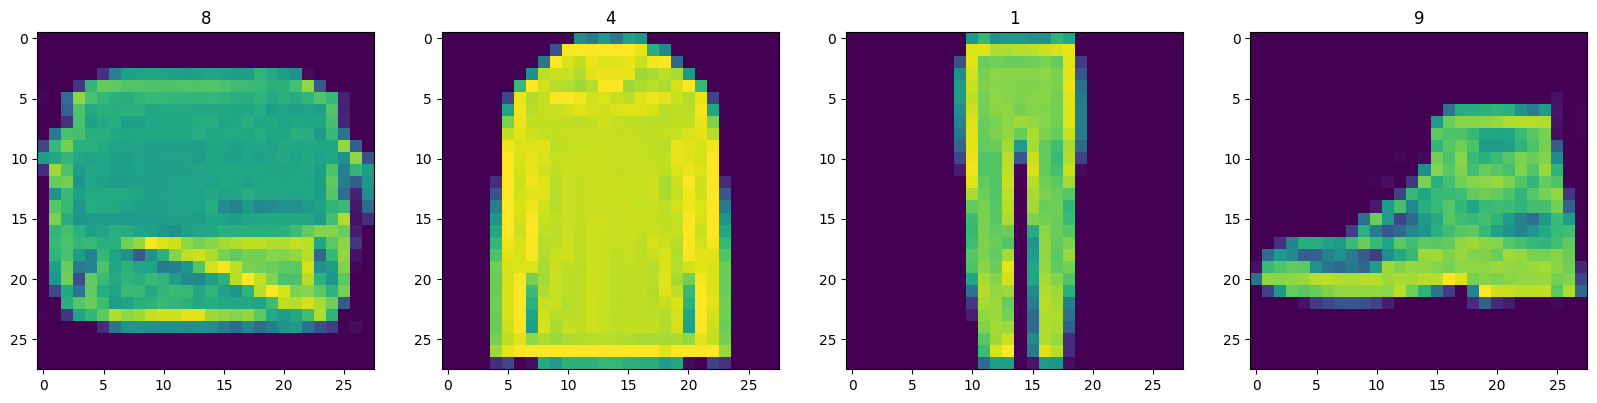

In [ ]:
#now we create a subplot

fig,ax=plt.subplots(ncols=4,figsize=(20,20)) #size of the plot and the number of columns
#ax is the individual subplot
#we loop 4 times to get four images
#each contains the image and the label
for idx in range(4):
  #grab an image and a label
  batch=data_iterator.next()
  #here squeeze reduces the dimension from 28x28x1 to 28x28
  #plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(batch['image'])) #this prints the image
  ax[idx].title.set_text(batch['label']) #this contains the label

PREPROCESS THE IMAGE

In [ ]:
#the deep learning algorithm works better when the data is normal that is every
#thing is in the range 0 to 1 , hence we transform the data
# here we scale and return the image only

def scale_images(data):
  image=data['image']
  return image/255 # we bring everything to the range 0 to 1
  #by divinding the quantity with the max possible value

before building a datapipeline before tensorflow we do the following things
1->map
2->cache
3->shuffle
4->batch
5->prefetch

In [ ]:
ds=tfds.load('fashion_mnist',split='train') #we again reload the data
ds=ds.map(scale_images)
#here we run the data through the scaled images data pipeline
ds=ds.cache()
#cache the data for the batch
ds=ds.shuffle(60000)
#shuffle the dataset for getting the random images
ds=ds.batch(128)
#create a batch of 128 images per sample
ds=ds.prefetch(64)
#we then prefetch which reduces the likelihood of bottlenecking

In [ ]:
ds.as_numpy_iterator().next().shape
#here the size is 128x28x28x1 because each sample now contains 128 images
#and the size of each image is 28x28x1  , 28 along the x axis, 28 along the y
#and 1 along the z axis(it has only one color channel)

(128, 28, 28, 1)

BUILD A NEURAL NETWORK


In [ ]:
#GANS has two model one model is the generator and the other is the disciminator
#the generator generates fake images and the disciminator detects the fake image and the real images
from tensorflow.keras.models import Sequential #api
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

#conv2d brings in the convolution layers
#dense layers brings fully connected layers
#flatten changes the dimension of the data to a single dimension
#reshape reshapes the data
#leakyrelu is an activation function
#dropout is the regularization function which helps us in reducing the overfitting
#upsampling upsamples the data from a lower value to a higher value



NOW WE BUILD THE GENERATOR

In [ ]:
def build_generator():
  model=Sequential()
  model.add(Dense(7*7*128,input_dim=128)) #generate images on the basis of 128 value also known as latent space
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128))) #the ouput of the first layer is 7x7x128
  #our image is of the dimanesion 28x28x1 , therfore we introduce more layers
  model.add(UpSampling2D()) #this increases the dimension to 14x14x128
  model.add(Conv2D(128,5,padding='same')) #kernel size is 5x5 and preserve the number of units=128
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D()) #this increases the dimension to 28x28x128
  model.add(Conv2D(1,5,padding='same')) #kernel size is 5x5 and number of units=1
  model.add(LeakyReLU(0.2))
  #the size of the image becomes 28x28x1

  #the size of the output now matches the size of the image therefore we can stop here
  #we now introduce the convolution layers to bring in more computation powers
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv layer to get to one color channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [ ]:
generator=build_generator()
generator.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_9 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
img #4 images will be created

1/1 [==============================] - 0s 79ms/step


array([[[[0.5004924 ],
         [0.5024632 ],
         [0.50160253],
         ...,
         [0.50056183],
         [0.50085914],
         [0.50051606]],

        [[0.50112236],
         [0.502419  ],
         [0.50295365],
         ...,
         [0.5000363 ],
         [0.50061035],
         [0.50005156]],

        [[0.50141394],
         [0.5027983 ],
         [0.50216776],
         ...,
         [0.50111824],
         [0.50117767],
         [0.5001732 ]],

        ...,

        [[0.5016438 ],
         [0.50293493],
         [0.5032272 ],
         ...,
         [0.5002937 ],
         [0.5001    ],
         [0.5001745 ]],

        [[0.5010747 ],
         [0.50133294],
         [0.5017345 ],
         ...,
         [0.49996164],
         [0.4998703 ],
         [0.49987668]],

        [[0.5008883 ],
         [0.50077367],
         [0.500512  ],
         ...,
         [0.49980542],
         [0.49984482],
         [0.4999202 ]]],


       [[[0.49980918],
         [0.49996498],
         [0.50

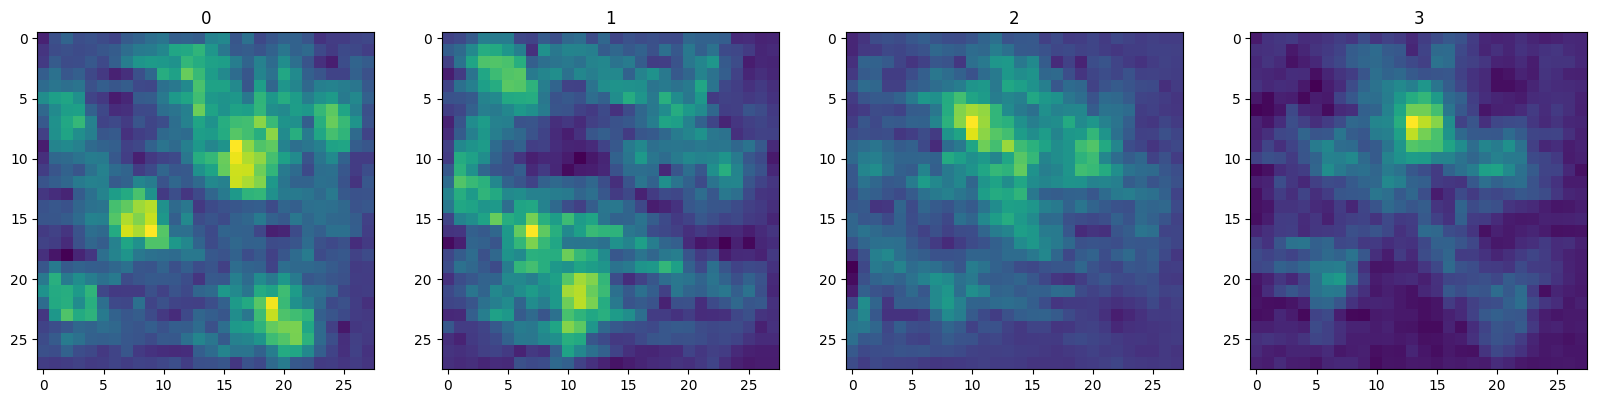

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20)) #size of the plot and the number of columns
#ax is the individual subplot
#we loop 4 times to get four images
#each contains the image and the label
for idx,img in enumerate(img):

  #here squeeze reduces the dimension from 28x28x1 to 28x28
  #plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(img)) #this prints the image
  ax[idx].title.set_text(idx) #this contains the label

BUILD DISCRIMINATOR

In [ ]:
def build_discriminator():
  model=Sequential()

  #add first convolutional layer
  model.add(Conv2D(32,5,input_shape=(28,28,1))) #this take in the image from the generator
  model.add(LeakyReLU(0.2)) #leaky relu activation  layer
  model.add(Dropout(0.4)) #we add dropout layer to stop overfitting


  #add second convolutional layer
  model.add(Conv2D(64,5)) #this take in the image from the generator
  model.add(LeakyReLU(0.2)) #leaky relu activation  layer
  model.add(Dropout(0.4)) #we add dropout layer to stop overfitting

  #add third convolutional layer
  model.add(Conv2D(128,5)) #this take in the image from the generator
  model.add(LeakyReLU(0.2)) #leaky relu activation  layer
  model.add(Dropout(0.4)) #we add dropout layer to stop overfitting

  #add fourth convolutional layer
  model.add(Conv2D(256,5)) #this take in the image from the generator
  model.add(LeakyReLU(0.2)) #leaky relu activation  layer
  model.add(Dropout(0.4)) #we add dropout layer to stop overfitting

  #flatten and then pass to the dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))



  return model


In [ ]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_59 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_33 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_34 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)     

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 147ms/step


array([[0.504413  ],
       [0.50438666],
       [0.5043974 ],
       [0.50440115]], dtype=float32)

TRAINING LOOP

In [ ]:
#we set a loss function
#optimizer for both , the discriminator and the generator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy



In [ ]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()


In [ ]:
#NOW we build the sub class model

from tensorflow.keras.models import Model
class FashionGan(Model):
  def __init__(self,generator,disciminator,*args,**kwargs):
    super().__init__(*args,*kwargs)

    self.generator=generator
    self.discriminator=discriminator


  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().__init__(*args,**kwargs)

    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss


  def train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)

    with tf.GradientTape() as d_tape:

      y_hat_real=self.discriminator(real_images,training=True)
      y_hat_fake=self.discriminator(fake_images,triaining=True)

      yhat_real_fake=tf.concat([y_hat_real,y_hat_fake],axis=0)

      y_realfake=tf.concat([tf.zeros_like(y_hat_real,y_hat_fake),tf.ones_like(y_hat_fake)],axis=0)

      #now we add some noise to TRUE OUTPUTS
      noise_real=0.15*tf.random.uniform(tf.shape(y_hat_real))
      noise_fake=0.15*tf.random.uniform(tf.shape(y_hat_fake))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

      #calculate loss USING BINARY CROSS ENTROPY

      total_d_loss=self.d_loss(y_realfake,yhat_real_fake)


  #APPLY THE BACKPROPAGATION ALGORITHM
    d_grad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(d_grad,self.discriminator.trainable_variables)

    with tf.GradientTape() as g_tape:

      gen_images=self.generator(tf.random.normal((128,128,1),training= True))
     #create the predicted labels

      predicted_labels=self.discriminator(gen_images,training=False)

#calculate the loss
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
  #apply the backpropagation

    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradient(zip(ggrad,self.generator.trainable_variables))

    return total_d_loss,total_g_loss


In [ ]:
fashgan=FashionGan(generator,discriminator)



In [ ]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

Build Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
#create custom call back after every epoch


class ModelMonitor(Callback):
  def __init__(self,num_img=3,latent_dim=128):
    self.num_img=num_img
    self.latent_dim=latent_dim
  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors=tf.rndom.uniform((self.num_img,self.latent_dim,1))
    generated_images=self.model.generator(random_latent_vectors)
    generated_images +=255
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

TRAIN THE MODEL

In [ ]:
ds.as_numpy_iterator().next().shape


(128, 28, 28, 1)

In [ ]:
hist=fashgan.fit(ds,epochs=10)

RuntimeError: ignored

In [ ]:
plt.suptitle('LOSS')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='d_loss')
plt.legend()
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>